In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [3]:
import sys
print(sys.executable)


/opt/miniconda3/bin/python


In [4]:
%pip install matplotlib pandas numpy scipy scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 368.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 324.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.ppg_filter import bandpass_filter


Load dữ liệu ESP32

In [6]:
df = pd.read_csv("../data/raw_ppg/example.csv")

t = df["Time"].values
ppg = df["PPG"].values


fs = 125
# t = df["time_ms"].values / 1000.0  # ms → s
# ppg = df["ppg"].values


Vẽ raw PPG

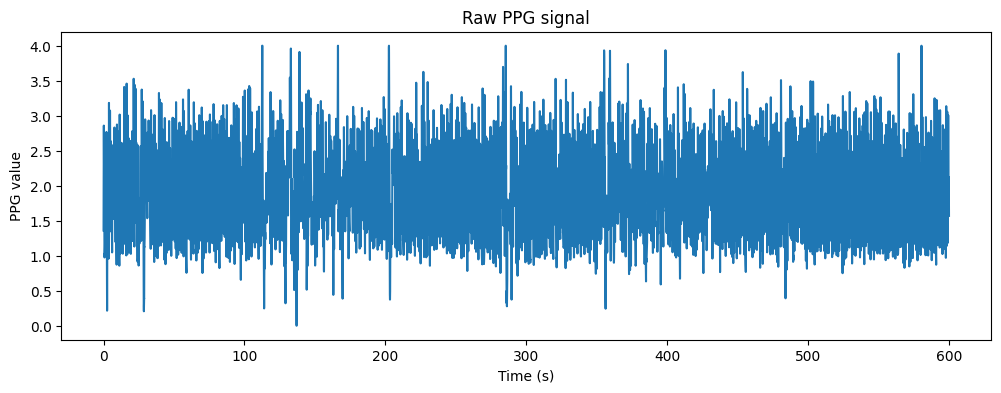

In [7]:
plt.figure(figsize=(12,4))
plt.plot(t, ppg)
plt.title("Raw PPG signal")
plt.xlabel("Time (s)")
plt.ylabel("PPG value")
plt.show()


Lọc PPG


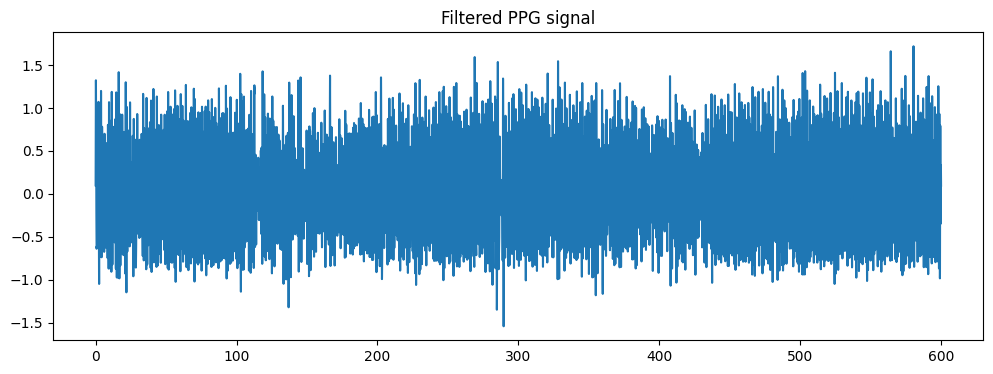

In [8]:
# fs = 100  # ESP32 delay(10) → ~100 Hz

from src.ppg_filter import bandpass_filter

ppg_filt = bandpass_filter(ppg, fs)

plt.figure(figsize=(12,4))
plt.plot(t, ppg_filt)
plt.title("Filtered PPG signal")
plt.show()


Detect peak


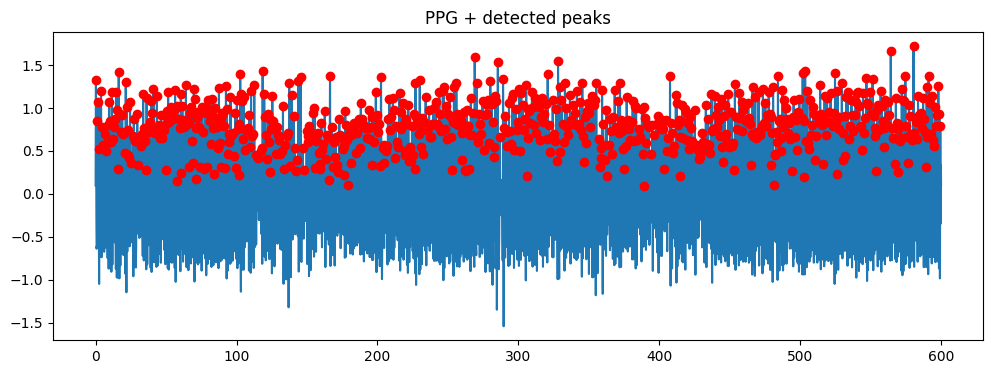

In [22]:
from src.peak_detection import detect_peaks
from src.hrv import compute_rr, hrv_features

peaks = detect_peaks(ppg_filt, fs)

plt.figure(figsize=(12,4))
plt.plot(t, ppg_filt)
plt.plot(t[peaks], ppg_filt[peaks], "ro")
plt.title("PPG + detected peaks")
plt.show()


Mỗi chấm đỏ là 1 nhịp tim


tính nhịp tim HRV

In [21]:
from src.hrv import compute_rr, hrv_features

rr = compute_rr(peaks, fs)
features = hrv_features(rr)
features


{'HR': np.float64(79.10019357853281),
 'MeanRR': np.float64(0.7585316455696203),
 'SDNN': np.float64(0.2306348989062467),
 'RMSSD': np.float64(0.3097957297475794)}

In [20]:
import pandas as pd

df = pd.read_csv("../data/raw_ppg/example.csv")

# chỉ giữ Time + PPG
df = df[["Time", "PPG"]]
df.columns = ["time", "ppg"]

# chia theo thời gian
rest = df[df["time"] < 300]
active = df[df["time"] >= 300]

rest.to_csv("../data/raw_ppg/rest.csv", index=False)
active.to_csv("../data/raw_ppg/active.csv", index=False)
